In [1]:
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from modules.predict_utils import *

In [ ]:
def get_cm(folder): 
    csv_path = f'./result/{folder}/confusion_matrix.csv'
    df = pd.read_csv(csv_path, index_col=0)

    # Plotting the confusion matrix
    plt.figure(figsize=(11, 9.5))
    confusion_matrix = sns.heatmap(df, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)

    plt.tight_layout(pad=3.0)
    # 调整标签字体大小
    plt.yticks(fontsize=8.0)  
    plt.xticks(fontsize=8.0)

    plt.savefig(f'./result/{folder}/confusion_matrix.png',dpi=300)

In [3]:
result_root = 'result_large_model'
result_folder = 'maxvit'

In [6]:
evaluator = ModelEvaluator(
    dataset_name='8_class_select',
    result_folder=result_folder,
    loader_type='test',
    batch_size=512,
    gpu_num=4,
    weight= 'loss'
)

In [5]:
net = evaluator.load_model()
if net != None:
    print('model loaded')

/home/wangcheng/anaconda3/envs/sd/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Loading model from best_loss.pth
model loaded


In [5]:
true_labels, predicted_labels,top3_predicted_labels, class_num, class_to_idx= evaluator.evaluate()


Loading model from best_loss.pth


100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


In [6]:

# 计算 Top-1 精确率
top1_accuracy = accuracy_score(true_labels, predicted_labels)
print("Top-1 Accuracy:", top1_accuracy)

# 计算 Top-3 精确率
# 需要将 top3_predicted_labels 转换为每个样本的 top-3 列表
top3_lists = np.array(top3_predicted_labels).reshape(-1, 3)
top3_accuracy = top_k_accuracy(true_labels, top3_lists, 3)
print("Top-3 Accuracy:", top3_accuracy)

Top-1 Accuracy: 0.8342425514057911
Top-3 Accuracy: 0.9723038187159043


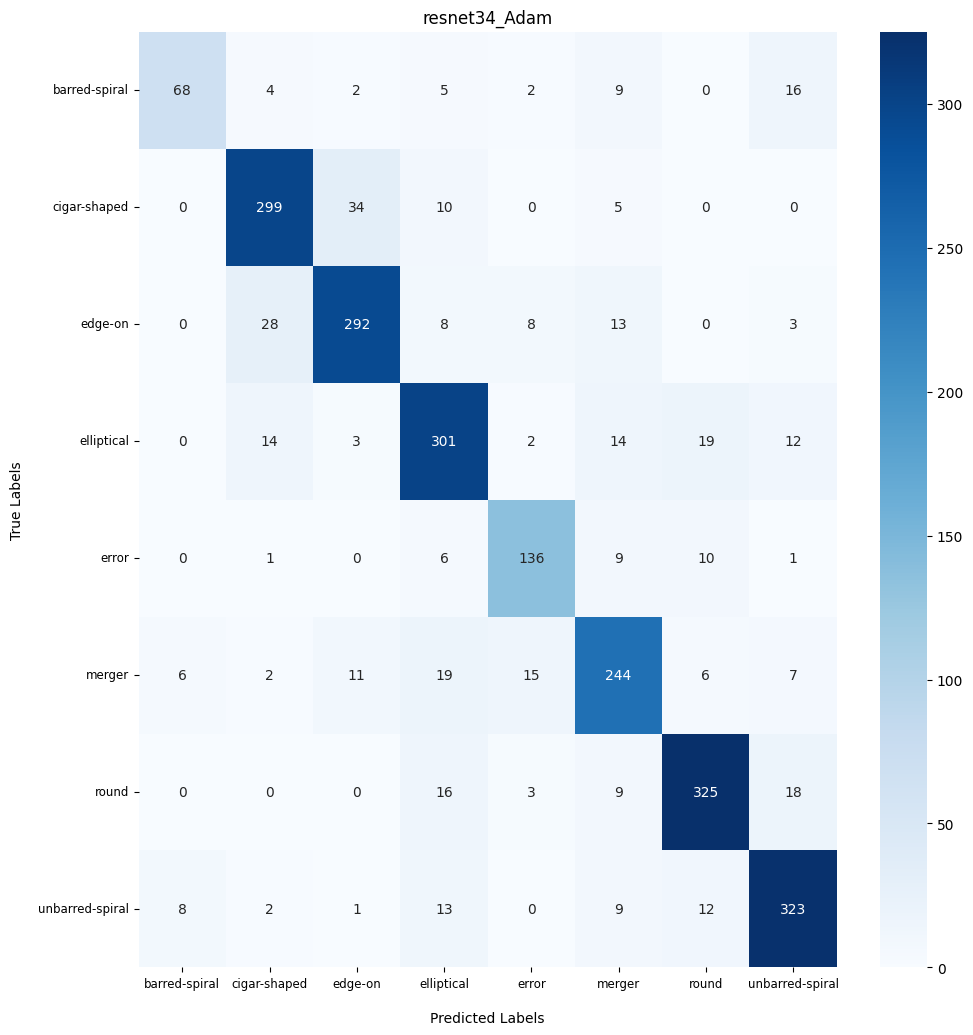

In [7]:
save_cm(result_root,true_labels, predicted_labels, class_num, class_to_idx, result_folder)

In [8]:
df,per_df= performance(
    result_root,
    result_folder,
    true_labels, 
    predicted_labels,
    class_num,
    class_to_idx,
    top1_accuracy,
    top3_accuracy)
print(f'{df}\n')
print(per_df)

           Metric  Macro Average Micro Average
0       Precision       0.832018      0.834243
1          Recall       0.816261      0.834243
2        F1 Score       0.822555      0.834243
3  Top-1 Accuracy       0.834243              
4  Top-3 Accuracy       0.972304              

             Label  Precision    Recall  F1 Score
0    barred-spiral   0.829268  0.641509  0.723404
1     cigar-shaped   0.854286  0.859195  0.856734
2          edge-on   0.851312  0.829545  0.840288
3       elliptical   0.796296  0.824658  0.810229
4            error   0.819277  0.834356  0.826748
5           merger   0.782051  0.787097  0.784566
6            round   0.873656  0.876011  0.874832
7  unbarred-spiral   0.850000  0.877717  0.863636


: 

In [ ]:
show_acc_loss(result_folder,100)

In [ ]:
import pickle

In [ ]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

In [ ]:
folder = 'resnet18'

In [ ]:
val_acc = load_pickle(f'./result/{folder}/acc_loss/val_acc_list_epoch_100.pkl')
val_acc = [x*100 for x in val_acc]

In [ ]:
val_acc

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels, labels=range(class_num))
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[k for k, _ in class_to_idx.items()], 
            yticklabels=[k for k, _ in class_to_idx.items()], ax=ax)
ax.set_xlabel('Predicted Labels',labelpad=15)
ax.set_ylabel('True Labels',labelpad=10)
ax.set_title(f'{result_folder}')

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.tight_layout(pad=3.0)
 # 调整标签字体大小
plt.yticks(fontsize=8.5)  
plt.xticks(fontsize=8.5)
# plt.subplots_adjust(bottom=0.2, top=0.9, left=0.2, right=0.8)

plt.savefig(f'result/{result_folder}/confusion_matrix.png',dpi=320)
plt.show()



In [ ]:
train_loss = load_pickle(f'result/{folder}/acc_loss/train_loss_list_epoch_100.pkl')


In [ ]:
# 画出损失和准确率图
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('ResNet18')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig(f'result/{result_folder}/acc_loss.png')
plt.show()

In [ ]:

# 使用pickle.dump函数将val_acc保存为pkl文件
with open(f'./result/{folder}/acc_loss/val_acc_list_epoch_100.pkl', 'wb') as f:
    pickle.dump(val_acc, f)
